In [2]:
import nltk
import re
from collections import Counter
from itertools import islice
import matplotlib.pyplot as plt

In [3]:
import pickle

### load test corpus, ngram counters

In [4]:
test_corpus = []
with open('../data/test_v2-preprocessed.txt','rt') as file:
    for line in file:
        test_corpus.append(line.split(' '))

# Pos-tag ngrams

In [6]:
nltk.download('averaged_perceptron_tagger')
import seaborn as sns

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\persi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\persi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
def plot_top_counter(counter, n=30):    
    top = counter.most_common(n)
    x, y = map(list,zip(*top))
    if not isinstance(x[0], str):
        x = list(map(repr, x))
    plt.figure(figsize=[15,15])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.barplot(x=y,y=x)

In [54]:
def plot_top_pos_instances(tagged_ngrams_counter, pos, m=30):
    instances_counter = Counter()
    for tagged_ngram, count in tagged_ngrams_counter.items():
        ngram, tags = tagged_ngram
        if tags == pos:
            instances_counter.update({ngram:count})
    top = instances_counter.most_common(m)
    x, y = zip(*top)
    x, y = list(x),list(y)
    plt.figure(figsize=[10,10])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(f'top instances for tags {pos}',fontsize=13)
    sns.barplot(x=y,y=x)

In [8]:
tagged_sentences = nltk.pos_tag_sents(test_corpus)

# UNIGRAMS

In [9]:
tagged_unigrams_counter = Counter()
for sentence in tagged_sentences:
    tagged_unigrams_counter.update(sentence)
    
unigram_tags_counter = Counter()
for uni_tag, count in tagged_unigrams_counter.items():
    _, tag = uni_tag
    unigram_tags_counter.update({tag : count})

### the most common POS

number of all unique UNIGRAM-TAG pair in test corpus: 227322
number of all unique unigram's tags in test corpus: 44


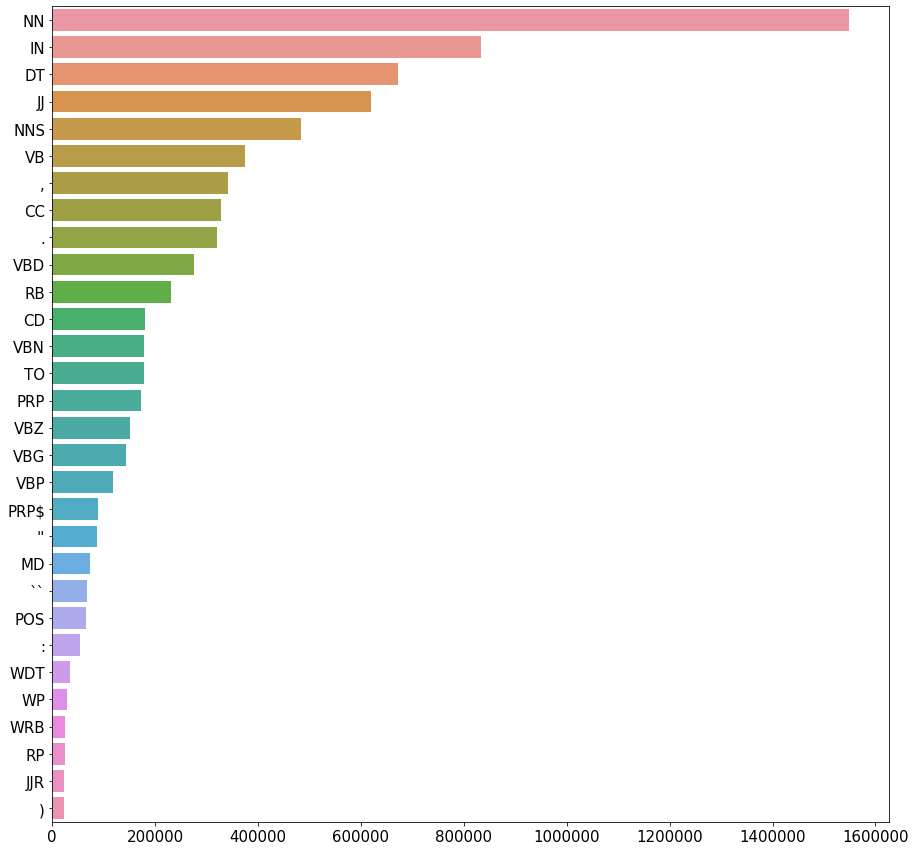

In [51]:
print(f"number of all unique UNIGRAM-TAG pair in test corpus: {len(tagged_unigrams_counter)}")
print(f"number of all unique unigram's tags in test corpus: {len(unigram_tags_counter)}")
plot_top_counter(unigram_tags_counter)

### the most common instances of individual POS

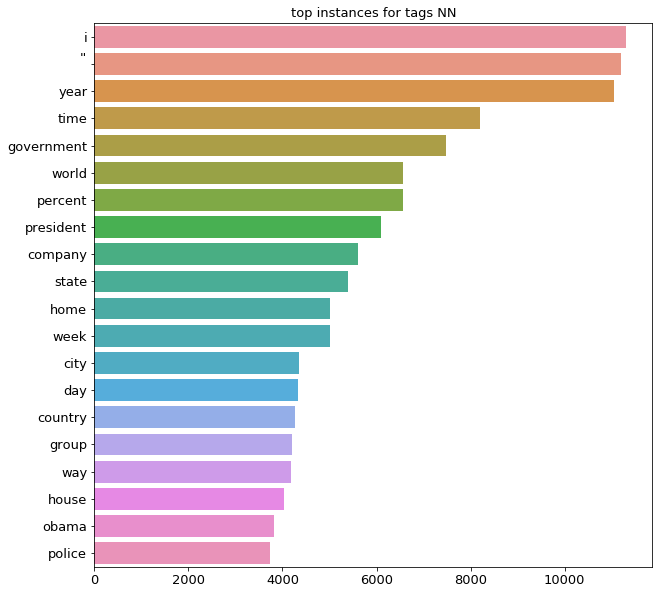

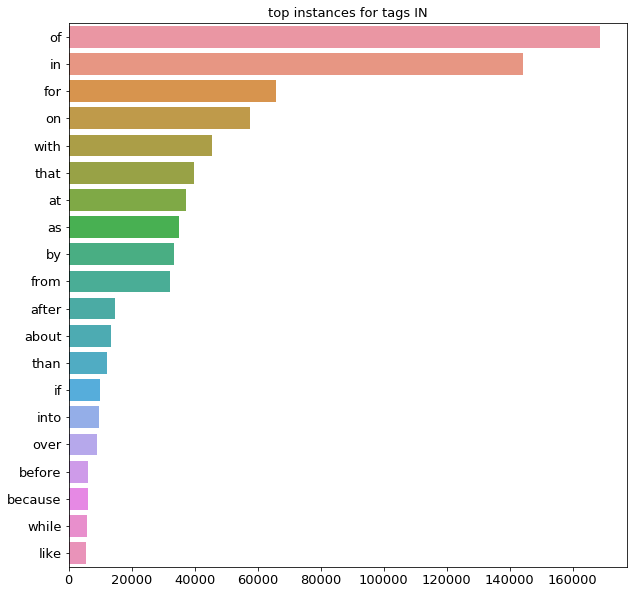

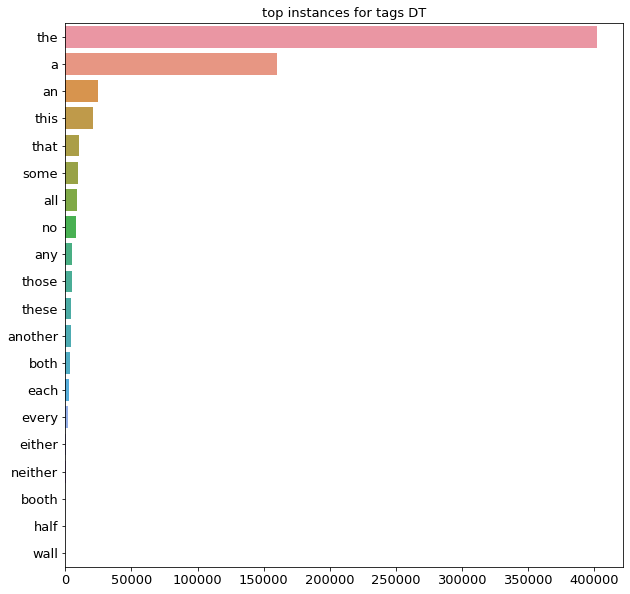

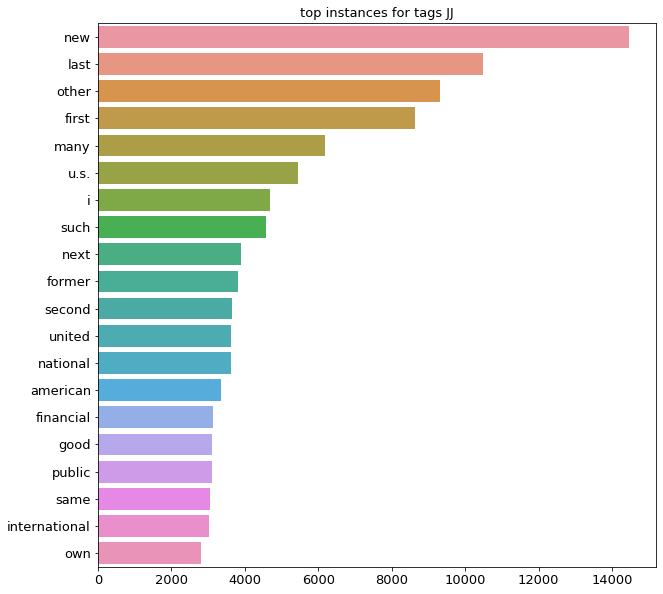

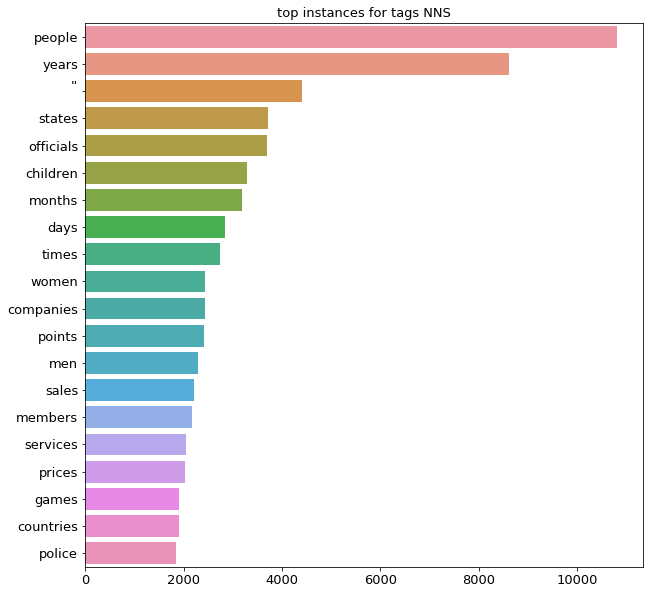

In [52]:
for tag, _ in unigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_unigrams_counter, 1, tag, 20)

# BIGRAMS

In [42]:
def get_ngrams_and_tags(sentence, n):
    for i in range(len(sentence) - n + 1):
        ngram, tags = zip(*sentence[i:i+n])
        yield ' '.join(ngram), tags

In [43]:
tagged_bigrams_counter = Counter()
for sentence in tagged_sentences:
    tagged_bigrams_counter.update(get_ngrams_and_tags(sentence,2))

In [47]:
bigram_tags_counter = Counter()
for tagged_bigram, count in tagged_bigrams_counter.items():
    _, tags = tagged_bigram
    bigram_tags_counter.update({tags : count})

### the most common pairs of POS

number of all unique BIGRAM-TAG pair in test corpus: 2053716
number of all unique bigram's tags in test corpus: 1587


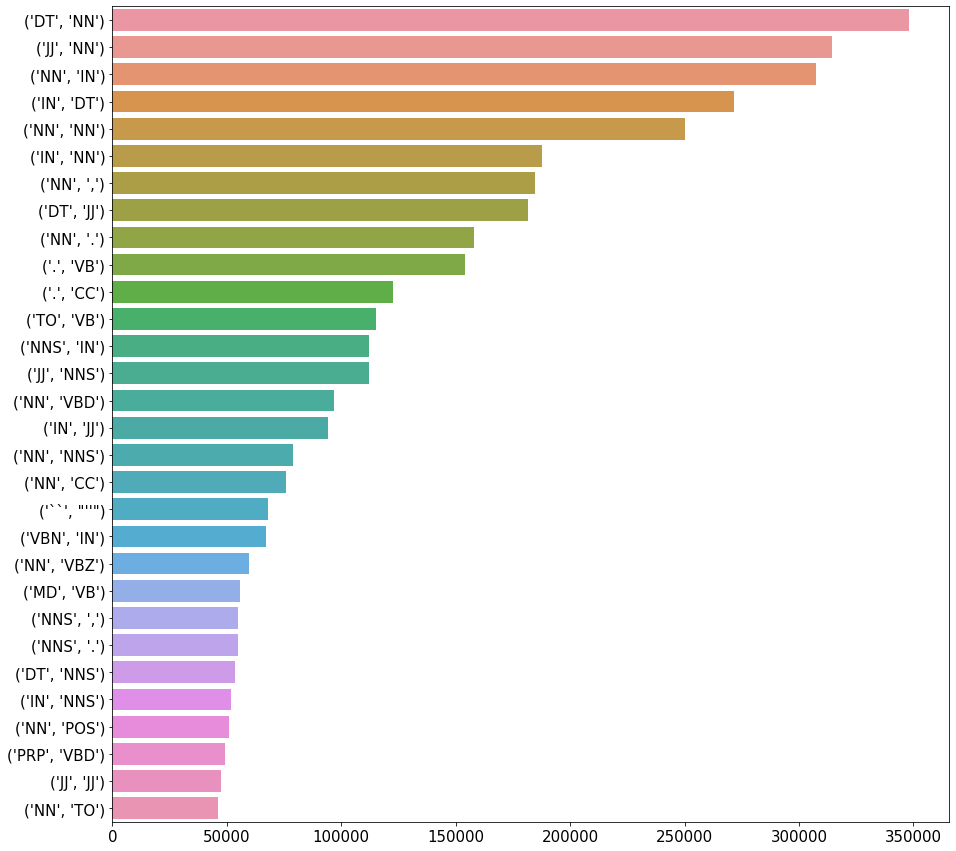

In [48]:
print(f"number of all unique BIGRAM-TAG pair in test corpus: {len(tagged_bigrams_counter)}")
print(f"number of all unique bigram's tags in test corpus: {len(bigram_tags_counter)}")
plot_top_counter(bigram_tags_counter)

### the most common instances of some pairs of POS

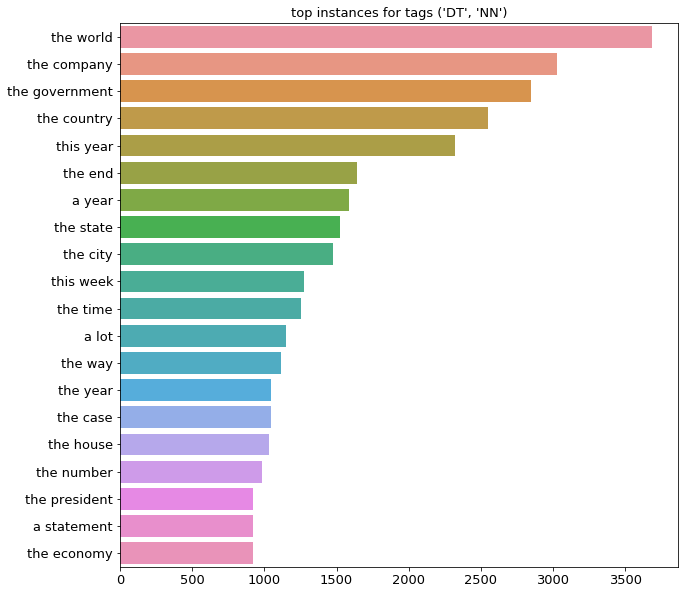

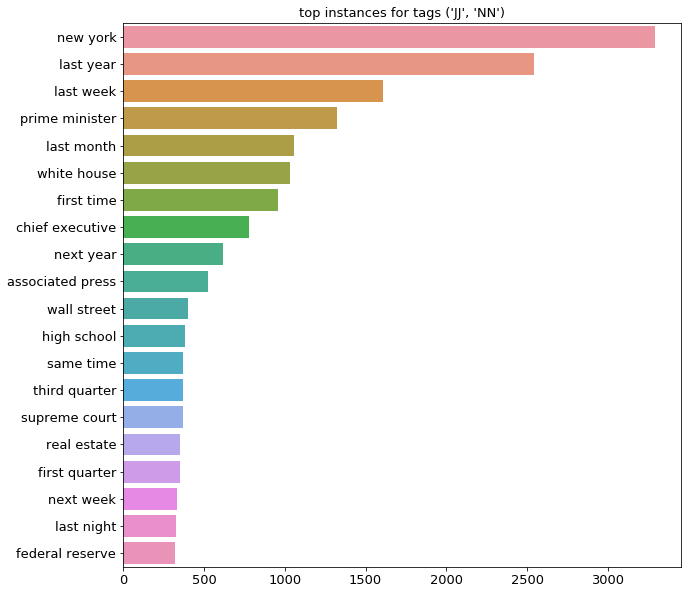

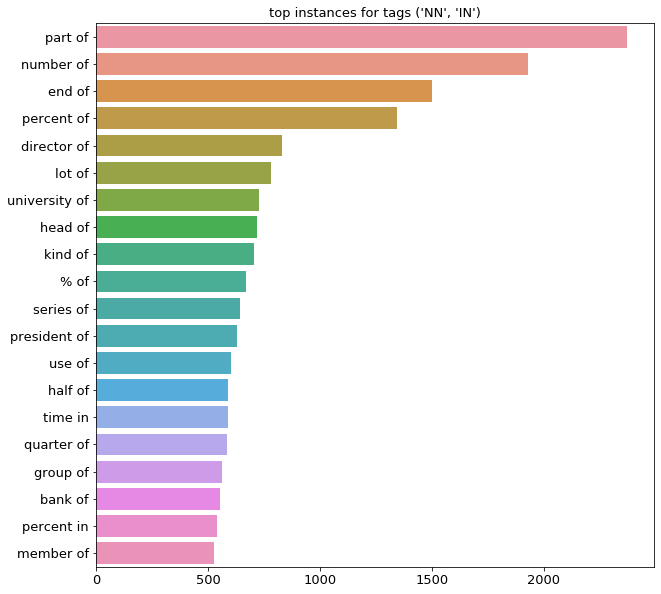

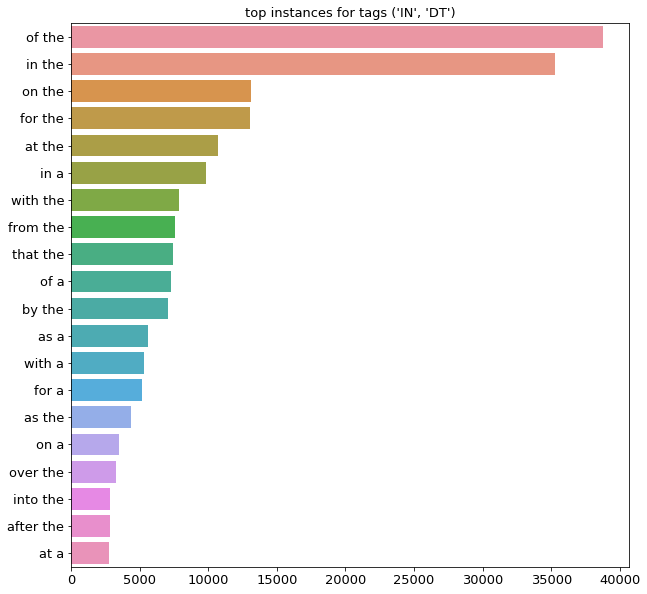

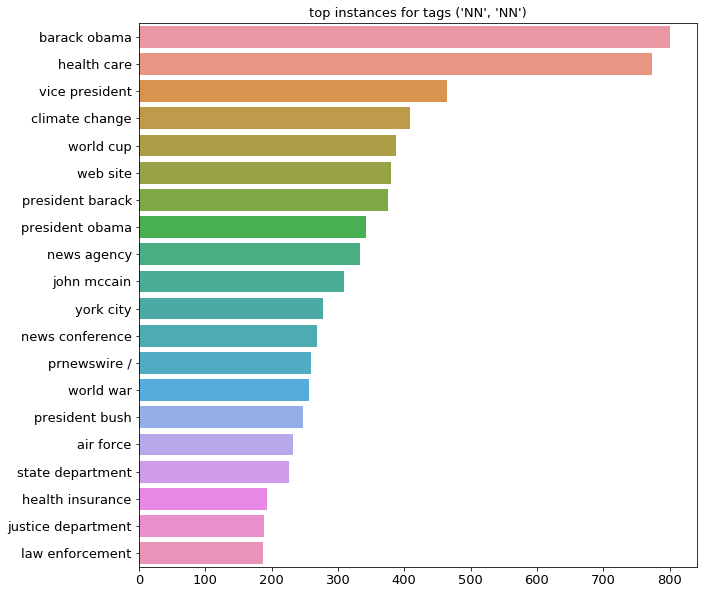

In [53]:
for tags, _ in bigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_bigrams_counter, tags, 20)

# TRIGRAMS

In [55]:
tagged_trigrams_counter = Counter()
for sentence in tagged_sentences:
    tagged_trigrams_counter.update(get_ngrams_and_tags(sentence,3))

In [56]:
trigram_tags_counter = Counter()
for tagged_trigram, count in tagged_trigrams_counter.items():
    _, tags = tagged_trigram
    trigram_tags_counter.update({tags:count})

### the most common triples of POS

number of all unique TRIGRAM-TAG pair in test corpus: 4743565
number of all unique trigram's tags in test corpus: 27950


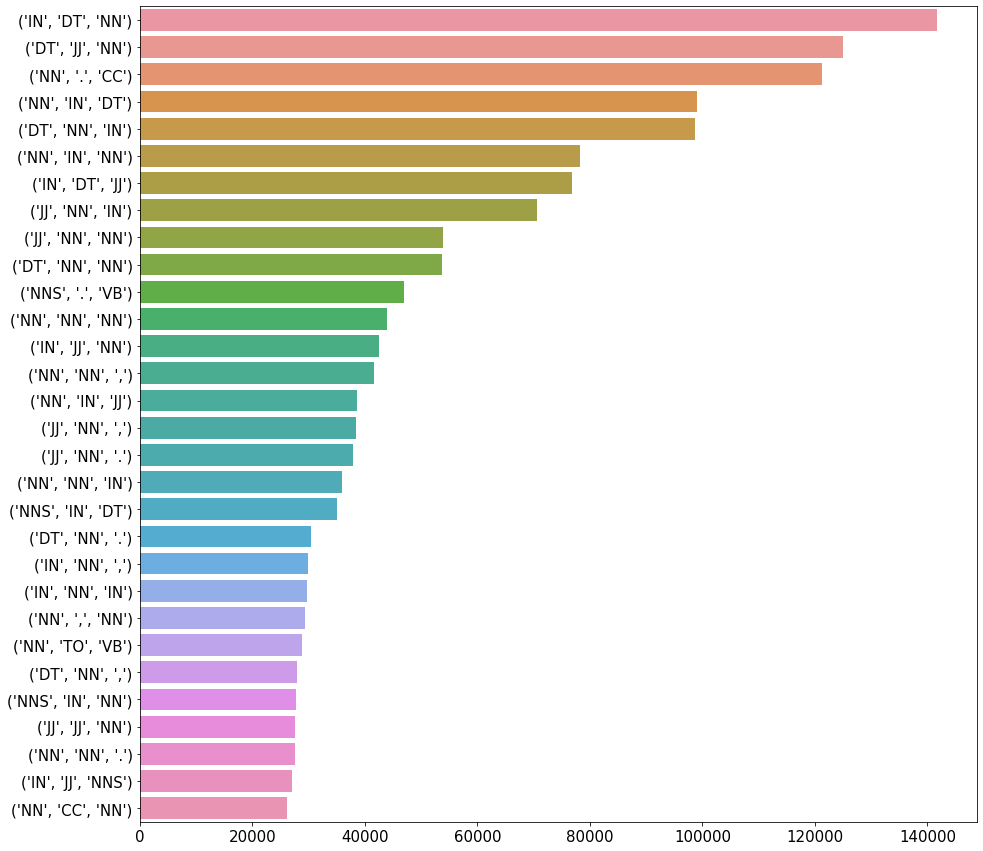

In [33]:
print(f"number of all unique TRIGRAM-TAG pair in test corpus: {len(tagged_trigrams_counter)}")
print(f"number of all unique trigram's tags in test corpus: {len(trigram_tags_counter)}")
plot_top_counter(trigram_tags_counter)

### the most common instances of some triples of POS

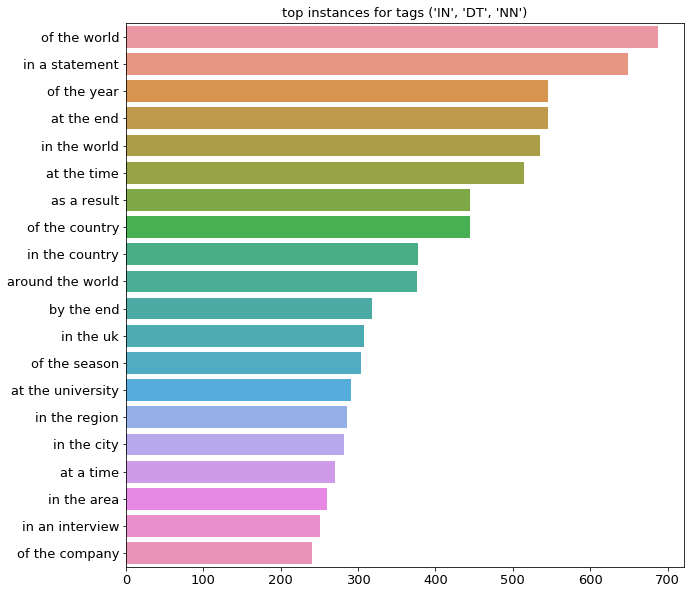

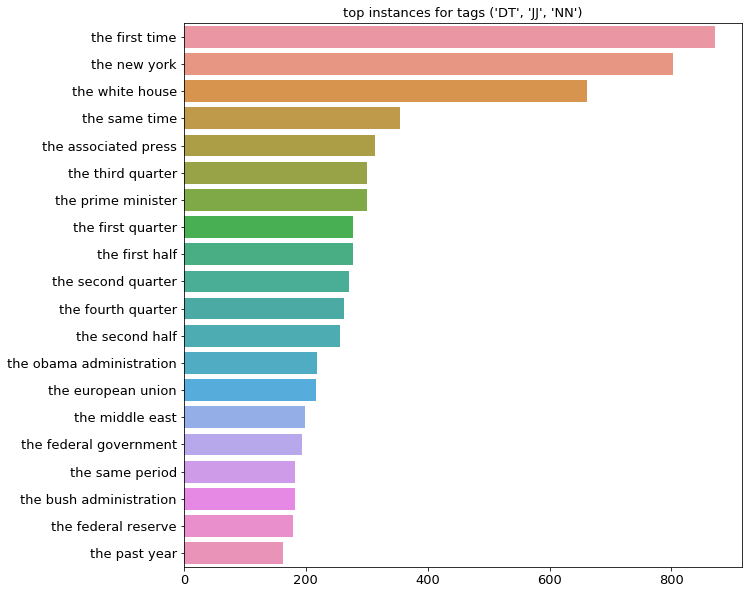

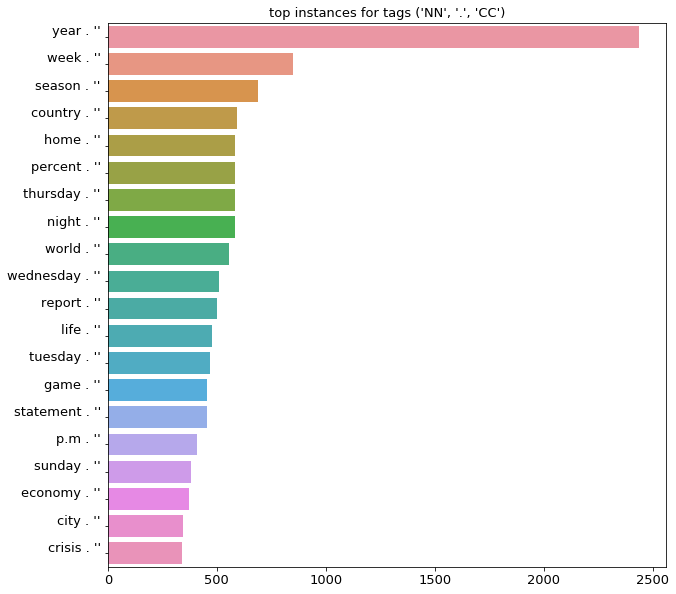

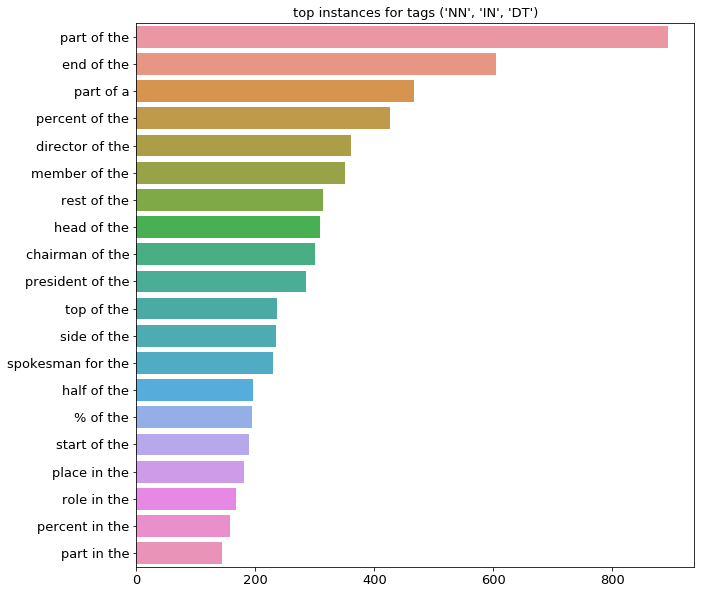

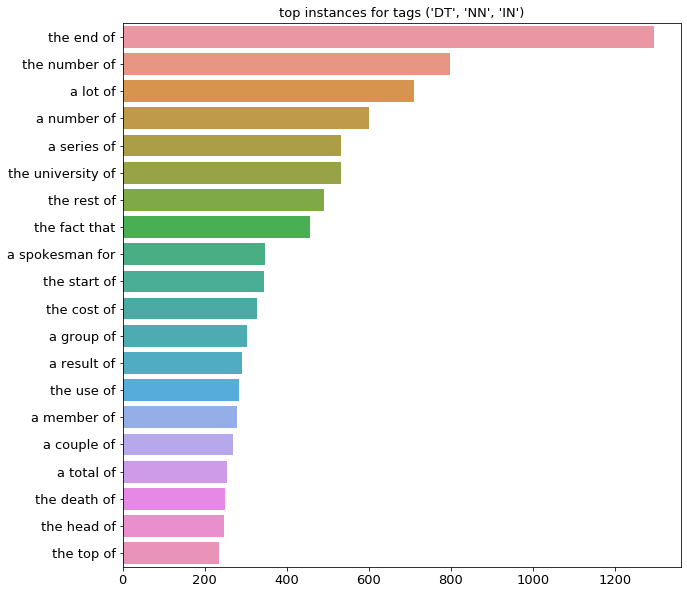

In [57]:
for tags, _ in trigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_trigrams_counter, tags, 20)

In [59]:
with open('../data/tagged_unigrams_counter_test_str.pickle', 'wb') as unigram_file, \
        open('../data/tagged_bigrams_counter_test_str.pickle', 'wb') as bigram_file, \
        open('../data/tagged_trigrams_counter_test_str.pickle', 'wb') as trigram_file:
    pickle.dump(tagged_unigrams_counter, unigram_file)
    pickle.dump(tagged_bigrams_counter, bigram_file)
    pickle.dump(tagged_trigrams_counter, trigram_file)    